# 1: What is Self Organization Maps?¶

1. The Self Organizing Map is one of the most popular neural models. It belongs to the category of the competitive learning network. The SOM is based on unsupervised learning, which means that is no human intervention is needed during the training and those little needs to be known about characterized by the input data. We could, for example, use the SOM for clustering membership of the input data. The SOM can be used to detect features inherent to the problem and thus has also been called SOFM the Self Origination Feature Map.

2. the purpose of SOM is that it’s providing a data visualization technique that helps to understand high dimensional data by reducing the dimension of data to map. SOM also represents the clustering concept by grouping similar data together.

3. Therefore it can be said that Self Organizing Map reduces data dimension and displays similarly among data. The figure below is a rough illustration of the structure of the SOM

# EXAMPLE 1: Traveling Salesman Problem¶
The Traveling Salesman Problem is a well known challenge in Computer Science: it consists on finding the shortest route possible that traverses all cities in a given map only once

# Selecting the number of nodes of neurons and neighbor length¶

1. Here is a simple example to learn. We create 40 points.Since selecting the number of nodes that is equal to the number of cities makes the process of node separation more delicate and results in sensitiveness of algorithm to the initial configuration, the authors recommended selecting the number of nodes as twice of the number of cities (m = 2n).

2. The neighborhood function determines the influence of the presented city on the lateral nodes of the winner, is another important factor. 
3. For the winner and its adjacent nodes, this attraction force is quite high and it deteriorates as the proximity node to the winner decreases. 
4. Considering this fact, we recommended that the effective neighbor length, which refers to the number of nodes that should be updated when a new winner is selected, is limited to 40% of the nodes. And the neighbor length also decreases gradually as time, which leads to a lower processing time.

In [1]:
!pip install MiniSom


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10663 sha256=4c1236f389b7196ff8b07c0923a7c99ff3b8989d96a0900346e25abf176a37fb
  Stored in directory: c:\users\himan\appdata\local\pip\cache\wheels\61\e8\de\cd2df73e85e467e1cf90ff918c6d6f388eff8e9029dae8bd78
Successfully built MiniSom


In [2]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

In [3]:
np.random.RandomState(10)
N_points = 40
N_neurons = N_points*2
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
y = np.sin(t)+(np.random.rand(N_points)-.5)*.3

som = MiniSom(1, N_neurons, 2, sigma=8, learning_rate=.4,
              neighborhood_function='gaussian', random_seed=0)
points = np.array([x,y]).T
som.random_weights_init(points)

C:\Users\himan\anaconda3\Lib\site-packages\minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


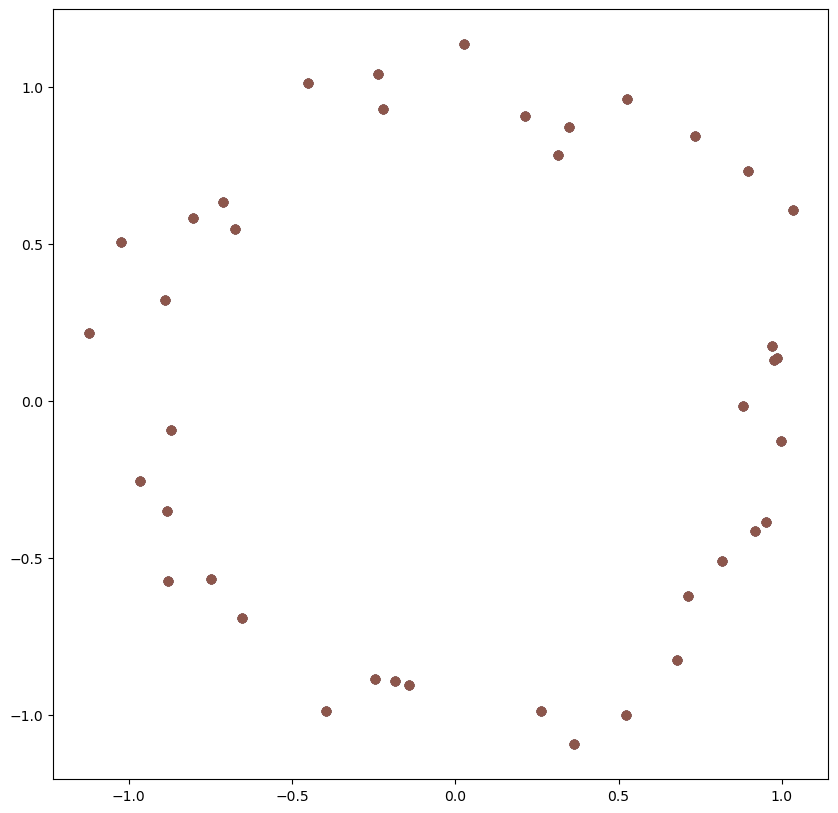

In [4]:
plt.figure(figsize=(10, 10))
for i, iterations in enumerate(range(5, 81, 5)):
    plt.scatter(x,y)

# Computational experiments¶

1. The modified growing ring SOM approach for TSP (MGSOM) is briefly described as follows:

2. Initialization: points is the number of cites. The algorithm inputs are the cartesian coordinate of the set of n cites. Let

3. Randomizing: Starting calculation with different initial ordering of the cities and label cities 1,...,n. Let i be the index of the city in presentation. Set i = 1 and reset the inhabitation status of all nodes to false. Inhibit½j ¼ false for j ¼ 1; ... ; m.

4. Parameters adaptation: The learning rate and the neighborhood function variance are calculated using Eqs

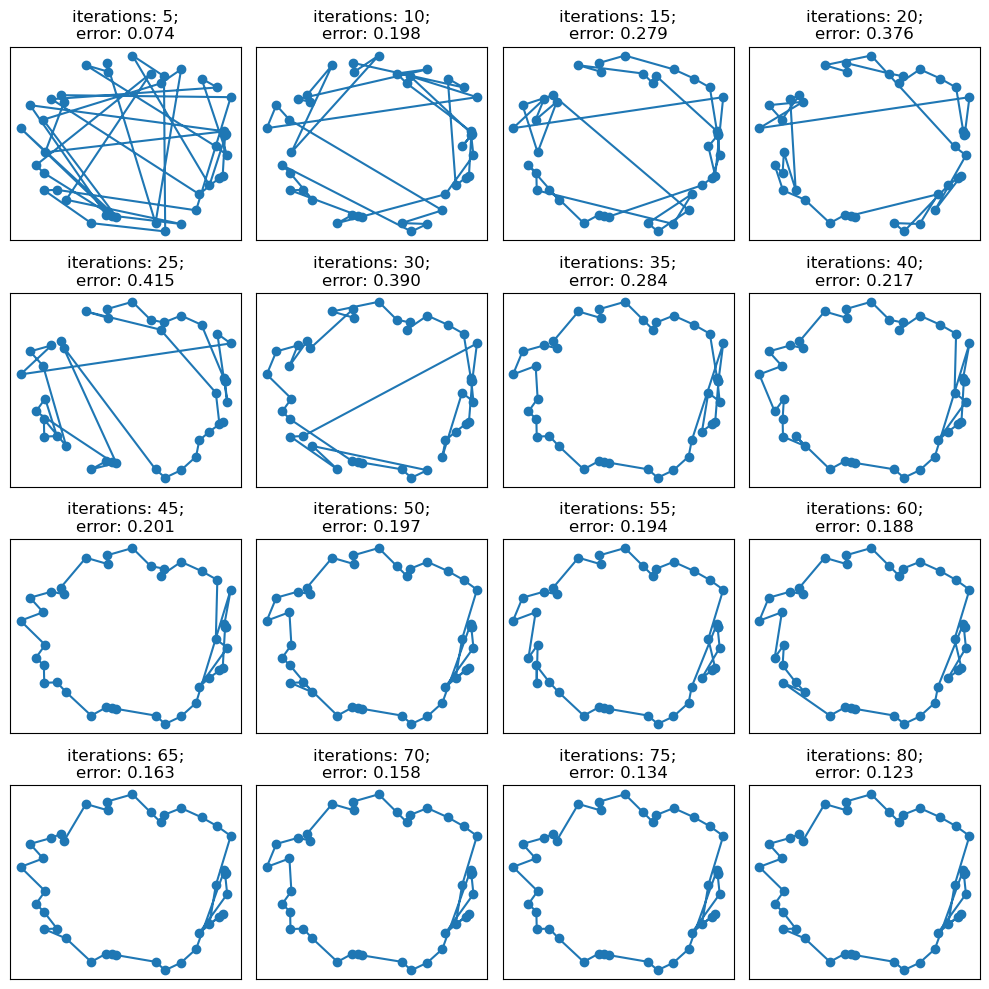

In [5]:
plt.figure(figsize=(10, 10))
for i, iterations in enumerate(range(5, 81, 5)):
    som.train(points, iterations, verbose=False, random_order=False)
    plt.subplot(4, 4, i+1)
    plt.scatter(x,y)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    plt.plot(points[visit_order][:,0], points[visit_order][:,1])
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations, 
                                                        e=som.quantization_error(points)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# EXAMPLE 2: Hand written digits detection¶
1. The goal of this example is to classify handwritten digits from MNIST dataset by using a Self-organising Map (SOM). Self-organising Map is a type of neural network that are useful to give low-dimensional representation of the input space of the training samples (in our case, two-dimensional). 

2. This artificial neural network is made of only two fully-connected layers:
an input layer a particular type of output layer: it consists of a two-dimensional map that is called the lattice. 
This lattice is characterized by a topological organization and the location of the output neurons on the lattice is important! In our case, the dimensions of the lattice are set to 10 x 10, thus there are 100 output neurons. The following image illustrates this structure:

In [6]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

In [7]:
# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

## Update the weights of the neurons of the SOM by using a neighborhood function. The closer a neuron is from the winner neuron in the lattice, the higher the value of the neighborhood function is and the more affected the neuron is. The weights update is "bigger" for a high value of the neighborhood function. The following picture illustrates the neighborhood function principles:

In [8]:
som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

C:\Users\himan\anaconda3\Lib\site-packages\minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.0073565990015547


## Not that each input vector for the SOM represents the entire image obtained reshaping the original image of dimension 8-by-8 into a vector of 64 elements. The images in input are gray scale.

## We can now place each digit on the map represented by the SOM:

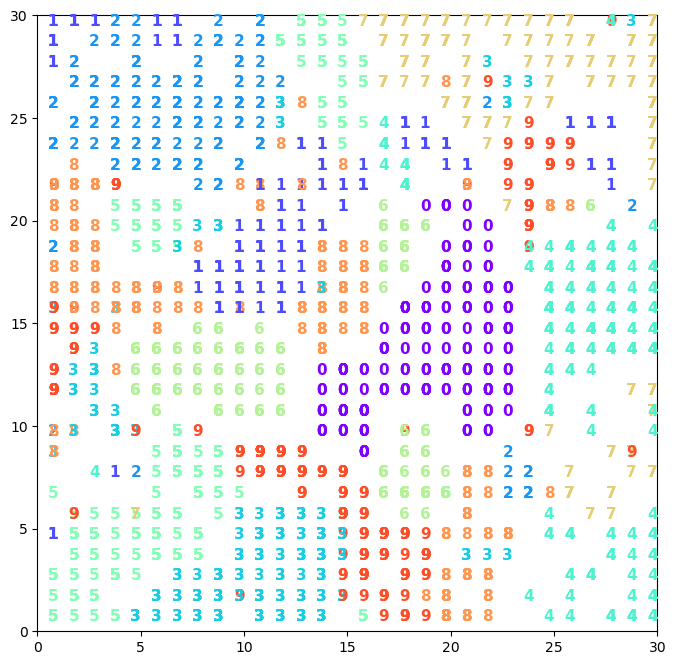

In [9]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
#plt.savefig('resulting_images/som_digts.png')
plt.show()

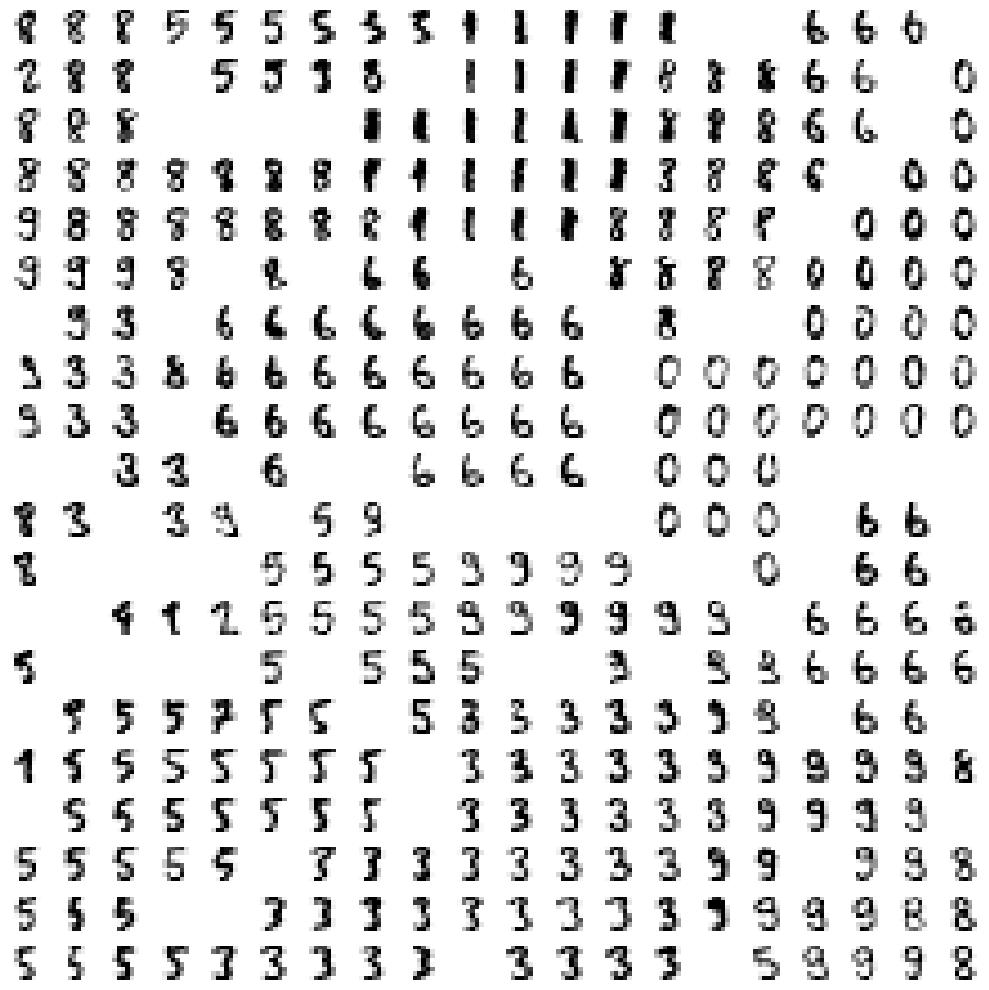

In [10]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
#plt.savefig('resulting_images/som_digts_imgs.png')
plt.show()

# EXAMPLE 3: Outliers Detection¶

In [11]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale

# First let's create a datast with two clusters of data a 35% percento of outliers¶


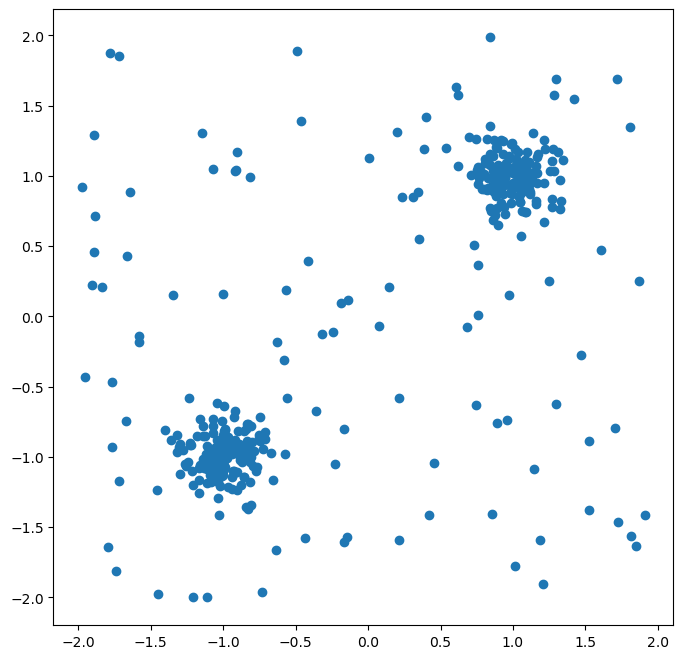

In [12]:
outliers_percentage = 0.35
inliers = 300
outliers = int(inliers * outliers_percentage)


data = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[.3, .3],
                  n_samples=inliers, random_state=0)[0]

data = scale(data)
data = np.concatenate([data, 
                       (np.random.rand(outliers, 2)-.5)*4.])

plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## What we expect from a good outlier algorithm is that all the samples far away from the two main clusters are labeled as outliers. This can be obtained considering as outliers the samples with a high quantization error.

To test this idea we have to 1) train a SOM, 2) compute the quantization error, 3) set a treshold for the quantization error:

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.46501429802428196
Error treshold: 0.3514964369634184


C:\Users\himan\anaconda3\Lib\site-packages\minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


Text(0, 0.5, 'frequency')

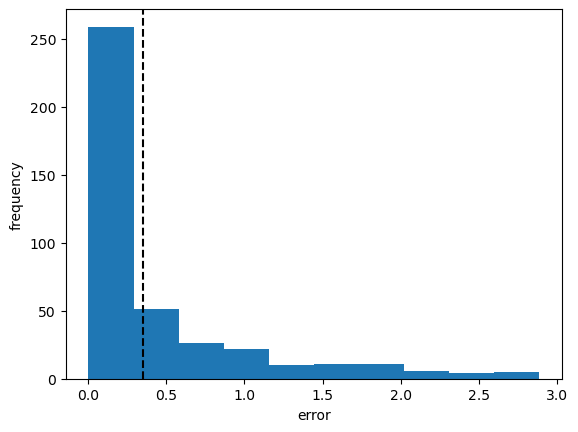

In [13]:
som = MiniSom(2, 1, data.shape[1], sigma=1, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)


som.train(data, 100, random_order=False, verbose=True)  # random training

quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)
error_treshold = np.percentile(quantization_errors, 
                               100*(1-outliers_percentage)+5)

print('Error treshold:', error_treshold)

is_outlier = quantization_errors > error_treshold

plt.hist(quantization_errors)
plt.axvline(error_treshold, color='k', linestyle='--')
plt.xlabel('error')
plt.ylabel('frequency')

## This histogram shows the frequency of the quantization error. The dashed line represents the treshold picked to label the outliers. We can see that most of the samples have a low quantization error and the errors higher than the treshold are much more rare. (Notice that we were able to set a good treshold as we knew the percentage of outliers in our data. This is usually a parameter to tune experimentally.)

## We are now ready to plot our dataset again highlighting the outliers with a different color:

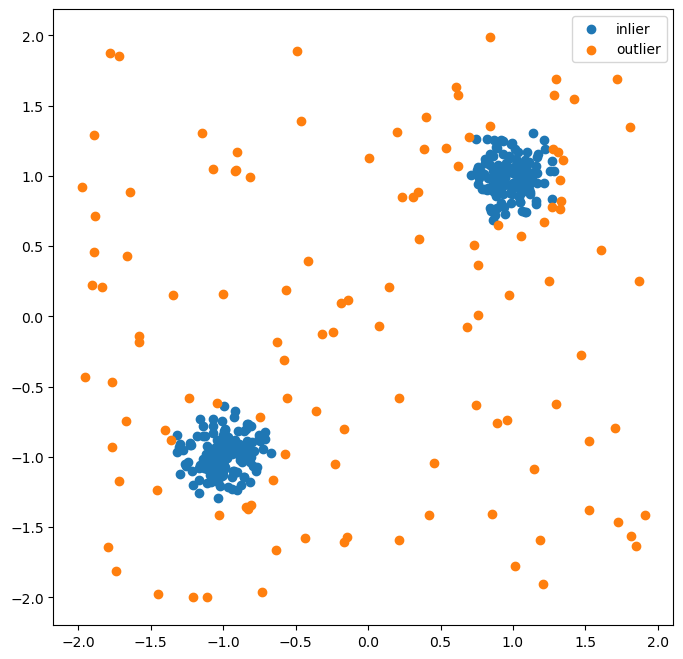

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1],
            label='inlier')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1],
            label='outlier')
plt.legend()
#plt.savefig('resulting_images/som_outliers_detection.png')
plt.show()

In [15]:
from sklearn.datasets import make_circles
data = make_circles(noise=.1, n_samples=inliers, random_state=0)[0]
data = scale(data)
data = np.concatenate([data, 
                       (np.random.rand(outliers, 2)-.5)*4.])


som = MiniSom(5, 5, data.shape[1], sigma=1, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)


som.train_batch(data, 100, verbose=True)  
quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)
error_treshold = np.percentile(quantization_errors, 
                               100*(1-outliers_percentage)+5)
is_outlier = quantization_errors > error_treshold

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.3621564681516706


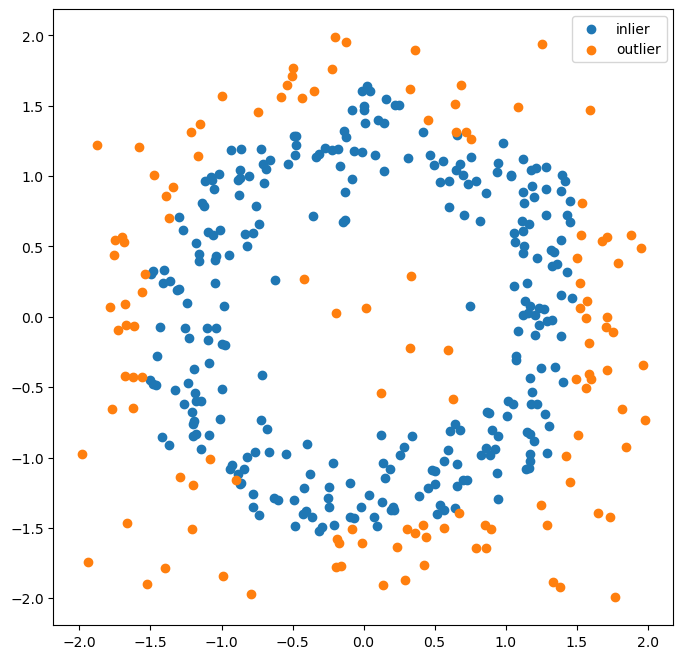

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1],
            label='inlier')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1],
            label='outlier')

plt.legend()
#plt.savefig('resulting_images/som_outliers_detection_circle.png')
plt.show()